# Demo of the `tsa` module

The `tsa` module allows to generate samples from ARMA and VARMA processes as well as computing autocorrelation, partial autocorrelation and cross-correlation functions.

In [1]:
import sys
sys.path.append('..')
import tundraden as td
import matplotlib.pyplot as plt
import numpy as np

## ARMA process

### AR(1) process

In the following, samples from the following AR(1) process are generated,

\begin{equation}
    X_{t} - 0.9 X_{t-1} = \varepsilon_{t}.
\end{equation}

By default, the noise variance is $\sigma^2=1$.

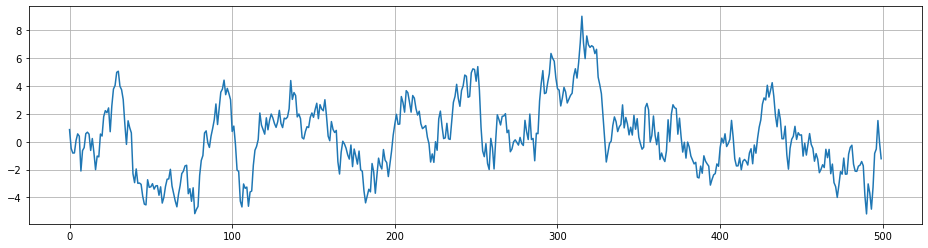

In [2]:
ar = [1, -0.9]
ma = [1]
n = 500
x = td.tsa.generate_arma_samples(ar, ma , n)
plt.figure(figsize=(16,4))
plt.plot(x)
plt.grid()
plt.show()

Now let's plot the autocorrelation function (ACF) and partial autocorrelation function (PACF).

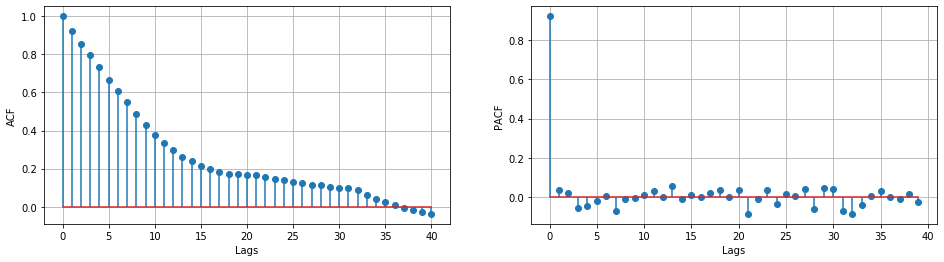

In [3]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
td.display.acf(x)
plt.grid()
plt.subplot(1,2,2)
td.display.pacf(x)
plt.grid()
plt.show()

The ACF slowly decreases and the PACF is zero for lags higher than 0, which is characteritic of an AR(1) process.

### MA(1) process

Now the following MA(1) process is simulated,

\begin{equation}
    X_{t} = \varepsilon_{t} + 0.9\varepsilon_{t-1}.
\end{equation}

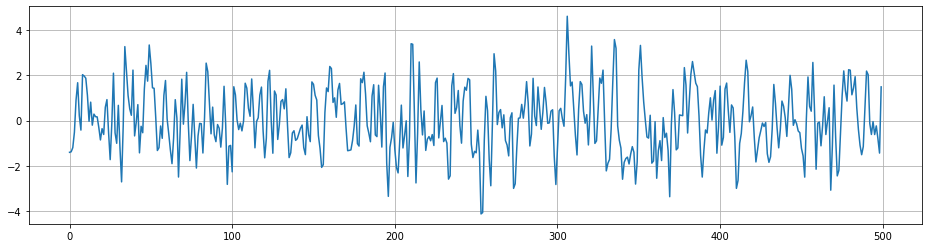

In [4]:
ar = [1]
ma = [1, 0.9]
n = 500
x = td.tsa.generate_arma_samples(ar, ma , n)
plt.figure(figsize=(16,4))
plt.plot(x)
plt.grid()
plt.show()

And the ACF and PACF:

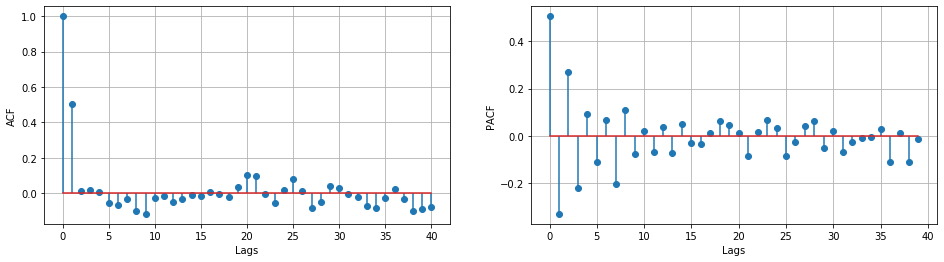

In [5]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
td.display.acf(x)
plt.grid()
plt.subplot(1,2,2)
td.display.pacf(x)
plt.grid()
plt.show()

The ACF is zero for lags higher than 1 and the PACF decreases slowly, which is characteritic of an MA(1) process.

### ARMA(2,1) process

Now the following ARMA(2,1) process is simulated,

\begin{equation}
    X_{t} + 0.2X_{t-1} - 0.5X_{t-2} = \varepsilon_{t} + 0.3\varepsilon_{t-1}.
\end{equation}

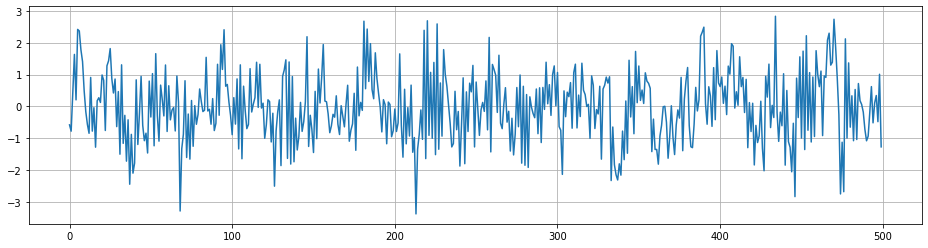

In [6]:
ar = [1, 0.2, -0.5]
ma = [1, 0.3]
n = 500
x = td.tsa.generate_arma_samples(ar, ma , n)
plt.figure(figsize=(16,4))
plt.plot(x)
plt.grid()
plt.show()

And the ACF and PACF:

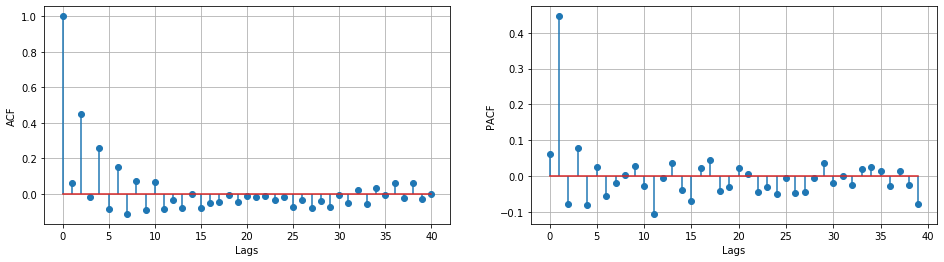

In [7]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
td.display.acf(x)
plt.grid()
plt.subplot(1,2,2)
td.display.pacf(x)
plt.grid()
plt.show()

## VARMA process

### VAR(1) process

In the following, samples from the following bivariate VAR(1) process are generated,

\begin{equation}
    \begin{pmatrix}
        X_{1,t}\\
        X_{2,t}
    \end{pmatrix} +
    \begin{pmatrix}
        0 & -0.9 \\
        -0.9 & 0
    \end{pmatrix}
    \begin{pmatrix}
        X_{1,t-1}\\
        X_{2,t-1}
    \end{pmatrix} =
    \begin{pmatrix}
        \varepsilon_{1,t}\\
        \varepsilon_{2,t}
    \end{pmatrix}.
\end{equation}

By default, the noise variance is $\begin{equation}\Sigma =\begin{pmatrix}1 & 0 \\0 & 1\end{pmatrix}\end{equation}$.

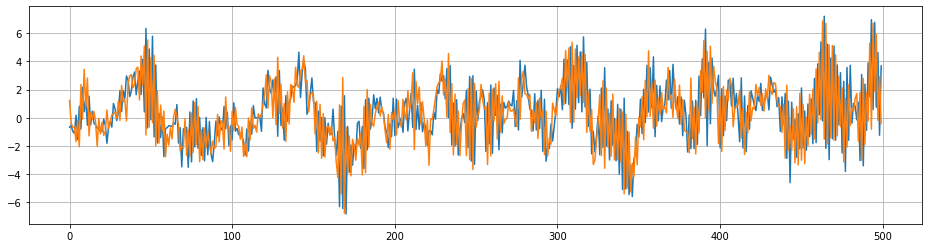

In [8]:
ar = [
    np.identity(2),
    np.array([
        [0, -0.9],
        [-0.9, 0],
    ]),
]
ma = [
    np.identity(2),
]
n = 500
X = td.tsa.generate_varma_samples(ar, ma, n)
plt.figure(figsize=(16,4))
plt.plot(X)
plt.grid()
plt.show()

Let's look at the cross-correlation function (CCF):

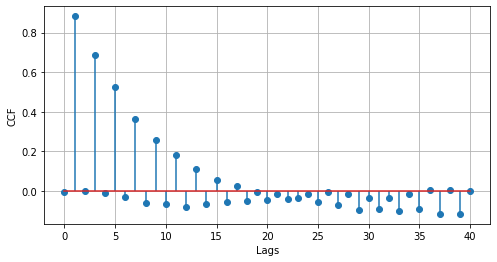

In [9]:
plt.figure(figsize=(8,4))
td.display.ccf(X[:,0], X[:,1])
plt.grid()
plt.show()

The CFF is decreases slowly and equals 0 every 2 lags.

### VMA(1) process

In the following, samples from the following bivariate VMA(1) process are generated,

\begin{equation}
    \begin{pmatrix}
        X_{1,t}\\
        X_{2,t}
    \end{pmatrix} =
    \begin{pmatrix}
        \varepsilon_{1,t}\\
        \varepsilon_{2,t}
    \end{pmatrix} +
    \begin{pmatrix}
        0 & 0 \\
        -1 & 0
    \end{pmatrix}
    \begin{pmatrix}
        \varepsilon_{1,t-1}\\
        \varepsilon_{2,t-1}
    \end{pmatrix}
\end{equation}

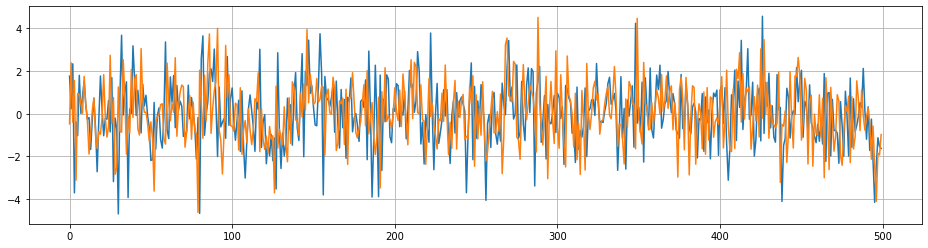

In [10]:
ar = [
    np.identity(2),
]
ma = [
    np.identity(2),
    np.array([
        [0, 1],
        [1, 0],
    ]),
]
n = 500
X = td.tsa.generate_varma_samples(ar, ma, n)
plt.figure(figsize=(16,4))
plt.plot(X)
plt.grid()
plt.show()

$X_{1,t}$ is simply white noise, while $X_{2,t}$ is a delayed version of $X_{1,t}$ with some extra noise. This is hard to see when plotting the samples, but it can be verified by looking at the CCF:

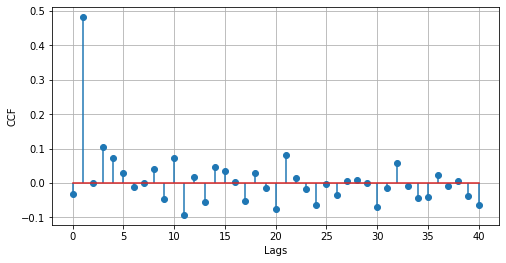

In [11]:
plt.figure(figsize=(8,4))
td.display.ccf(X[:,0], X[:,1])
plt.grid()
plt.show()

There is a spike at lag 1 indeed.